# Yaseen Haffejee 
# 1827555

# Importing Libraries

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage.color import rgb2gray, rgb2hsv,rgba2rgb
from skimage.exposure import rescale_intensity,equalize_hist
from skimage import img_as_float
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix,cohen_kappa_score,roc_curve,precision_recall_curve,auc

# 3) Reading and Displaying Images

### Read in the images and their masks

In [141]:
img_35 = plt.imread("./image-35.jpg")
img_35_mask = plt.imread("./mask-35.png")

img_83 = plt.imread("./image-83.jpg")
img_83_mask = plt.imread("./mask-83.png")

img_110 = plt.imread("./image-110.jpg")
img_110_mask = plt.imread("./mask-110.png")

### Use matplotlib.pyplot.imshow to view the 3 components of the images separately. Display the colour image. 

Since matplotlib reads in an image in the RGB format, we do not need to swap any components.

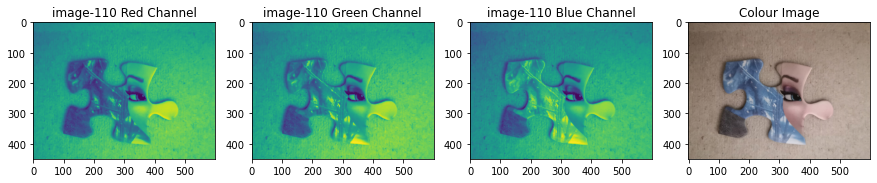

In [3]:
fig,ax = plt.subplots(nrows=1,ncols=4,figsize= (15,15))

plt.subplot(1,4,1),plt.imshow(img_110[:,:,0]),plt.title("image-110 Red Channel")
plt.subplot(1,4,2),plt.imshow(img_110[:,:,1]),plt.title("image-110 Green Channel")
plt.subplot(1,4,3),plt.imshow(img_110[:,:,2]),plt.title("image-110 Blue Channel")
plt.subplot(1,4,4),plt.imshow(img_110),plt.title("Colour Image")
plt.show()

### Use the skimage.color.rgb2gray function to convert the 3 images into grayscale and display them.

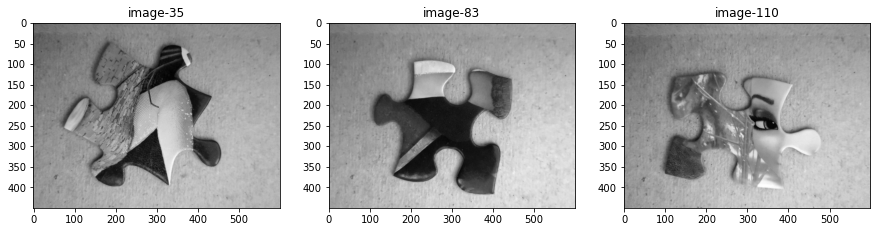

In [4]:
img_35_grayscale = rgb2gray(img_35)
img_83_grayscale = rgb2gray(img_83)
img_110_grayscale = rgb2gray(img_110)

fig,ax = plt.subplots(nrows=1,ncols=3,figsize= (15,15))

plt.subplot(1,3,1),plt.imshow(img_35_grayscale,cmap="gray"),plt.title("image-35")
plt.subplot(1,3,2),plt.imshow(img_83_grayscale,cmap="gray"),plt.title("image-83")
plt.subplot(1,3,3),plt.imshow(img_110_grayscale,cmap="gray"),plt.title("image-110")
plt.show()

### Use the skimage.color.rgb2hsv function to convert the 3 images into the HSV colour space and display them.

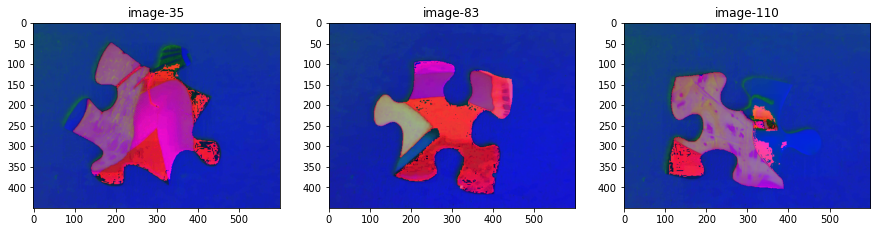

In [5]:
img_35_hsv = rgb2hsv(img_35)
img_83_hsv = rgb2hsv(img_83)
img_110_hsv = rgb2hsv(img_110)

fig,ax = plt.subplots(nrows=1,ncols=3,figsize= (15,15))

plt.subplot(1,3,1),plt.imshow(img_35_hsv),plt.title("image-35")
plt.subplot(1,3,2),plt.imshow(img_83_hsv),plt.title("image-83")
plt.subplot(1,3,3),plt.imshow(img_110_hsv),plt.title("image-110")
plt.show()

# 4) Descriptive Statistics

1. What is the width of the image?

In [6]:
print(f'The width of the image is: {np.shape(img_110)[1]} pixels')

The width of the image is: 600 pixels


2. What is the height of the image?

In [7]:
print(f'The height of the image is: {np.shape(img_110)[0]} pixels')

The height of the image is: 450 pixels


3. How many pixels are in the image in total?

In [8]:
print(f'The total number of pixels in the image is: {np.shape(img_110)[0]*np.shape(img_110)[1]} ')

The total number of pixels in the image is: 270000 


4. How many black pixels are there in the mask?

In [9]:
black_pixels_in_mask = len(np.where(img_110_mask==0)[0])
print(f'The number of black pixels in the image mask is: {black_pixels_in_mask}')

The number of black pixels in the image mask is: 625905


5. How many white pixels are there in the mask?


In [10]:
white_pixels_in_mask = len(np.where(img_110_mask!=0)[0])
print(f'The number of white pixels in the image mask is: {white_pixels_in_mask}')

The number of white pixels in the image mask is: 454095


#### Using the grayscale version of the image...

6. What is the minimum pixel value in the image?


In [11]:
print(f"The minimum pixel value of the image is: {np.min(img_110_grayscale)}")

The minimum pixel value of the image is: 0.05205882352941177


7. What is the maximum pixel value in the image?

In [12]:
print(f"The maximum pixel value of the image is: {np.max(img_110_grayscale)}")

The maximum pixel value of the image is: 0.8501392156862745


8. What are the minimum and maximum pixel values of the puzzle pixels?

In [13]:
tmp = img_110_grayscale[np.where(rgb2gray(rgba2rgb(img_110_mask))!=0)]
min_intensity = np.min(tmp)
max_intensity = np.max(tmp)
print(f"The minimum pixel value of the puzzle pixels is: {min_intensity}")
print(f"The maximum pixel value of the puzzle pixels is: {max_intensity}")

The minimum pixel value of the puzzle pixels is: 0.05205882352941177
The maximum pixel value of the puzzle pixels is: 0.8501392156862745


9. What are the minimum and maximum pixel values of the background pixels?

In [14]:
tmp1 = img_110_grayscale[np.where(rgb2gray(rgba2rgb(img_110_mask))==0)]
min_intensity = np.min(tmp1)
max_intensity = np.max(tmp1)
print(f"The minimum pixel value of the background pixels is: {min_intensity}")
print(f"The maximum pixel value of the background pixels is: {max_intensity}")

The minimum pixel value of the background pixels is: 0.11280980392156863
The maximum pixel value of the background pixels is: 0.7903247058823529


10. What is the mean pixel intensity in the image?

In [15]:
print(f"The mean pixel value of the image is: {np.mean(img_110_grayscale)}")

The mean pixel value of the image is: 0.5367658629745824


11. What is the mean brightness of the puzzle pixels?

In [16]:
print(f"The mean brightness of the puzzle pixels is: {np.mean(tmp)}")

The mean brightness of the puzzle pixels is: 0.46212266513932226


12. What is the mean brightness of the background pixels?

In [17]:
print(f"The mean brightness of the background pixels is: {np.mean(tmp1)}")

The mean brightness of the background pixels is: 0.558720376048423


13. What is the variance in the grayscale intensities for puzzle pixels?

In [18]:
print(f"The variance of the grayscale puzzle pixel intensities is: {np.var(tmp)}")

The variance of the grayscale puzzle pixel intensities is: 0.027338434270834756


14. What is the variance in the grayscale intensities for background pixels?

In [19]:
print(f"The variance of the grayscale background pixel intensities is: {np.var(tmp1)}")

The variance of the grayscale background pixel intensities is: 0.008878988263978916


#### Using the seaborn library...

15. Display a histogram of the red pixel intensities in the image


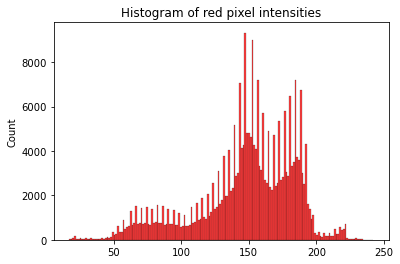

In [20]:
sns.histplot(img_110[:,:,0].ravel(),color="red")
plt.title("Histogram of red pixel intensities")
plt.show()

16. Display a histogram of the green pixel intensities in the image

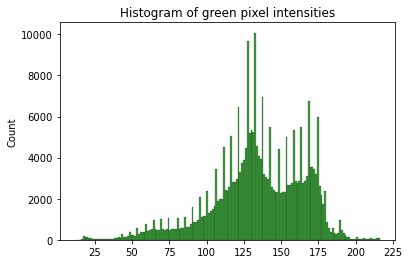

In [21]:
sns.histplot(img_110[:,:,1].ravel(),color="green")
plt.title("Histogram of green pixel intensities")
plt.show()

17. Display a histogram of the blue pixel intensities in the image

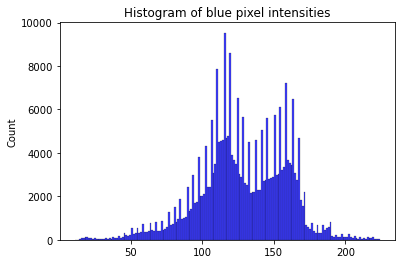

In [22]:
sns.histplot(img_110[:,:,2].ravel(),color="blue")
plt.title("Histogram of blue pixel intensities")
plt.show()

18. Repeat the previous 3 steps for one of the mask images


Red

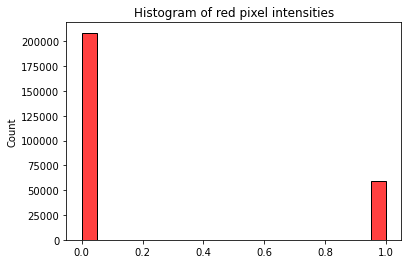

In [23]:
sns.histplot(img_110_mask[:,:,0].ravel(),color="red")
plt.title("Histogram of red pixel intensities")
plt.show()

Green

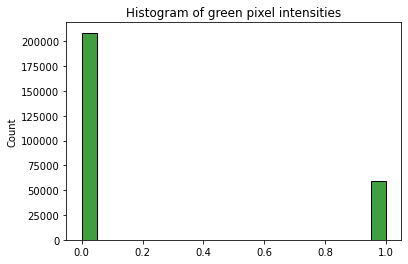

In [24]:
sns.histplot(img_110_mask[:,:,1].ravel(),color="green")
plt.title("Histogram of green pixel intensities")
plt.show()

Blue

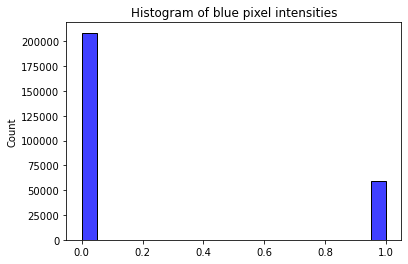

In [25]:
sns.histplot(img_110_mask[:,:,2].ravel(),color="blue")
plt.title("Histogram of blue pixel intensities")
plt.show()

19. Display a histogram of the pixel intensities of all pixels in the image (across all channels)

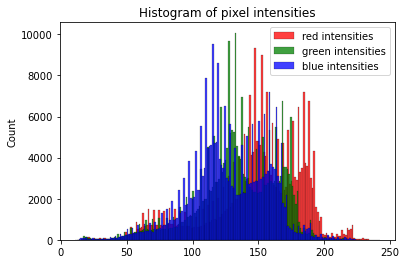

In [26]:
sns.histplot(img_110[:,:,0].ravel(),color="red",label='red intensities')
sns.histplot(img_110[:,:,1].ravel(),color="green",label='green intensities')
sns.histplot(img_110[:,:,2].ravel(),color="blue",label='blue intensities')
plt.legend()
plt.title("Histogram of pixel intensities")
plt.show()

20. Display a histogram of the pixel intensities of the pixels in the grayscale image.


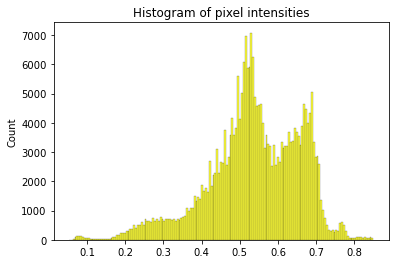

In [27]:
sns.histplot(img_110_grayscale.ravel(),color="yellow")
plt.title("Histogram of pixel intensities")
plt.show()

21. Display the relevant histograms of the channels in the HSV image.

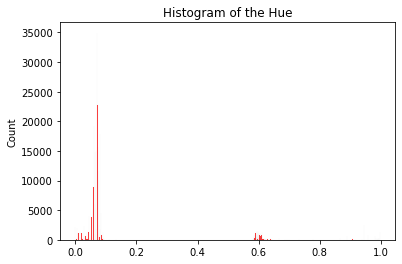

In [28]:
sns.histplot(img_110_hsv[:,:,0].ravel(),color="red",label='red intensities')
plt.title("Histogram of the Hue")
# sns.histplot(img_110_hsv[:,:,2].ravel(),color="blue",label='blue intensities')
plt.show()

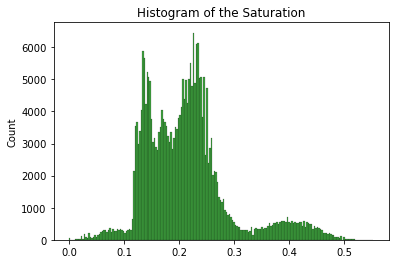

In [29]:
sns.histplot(img_110_hsv[:,:,1].ravel(),color="green",label='green intensities')
plt.title("Histogram of the Saturation")
plt.show()

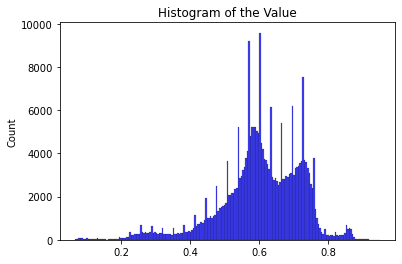

In [30]:
sns.histplot(img_110_hsv[:,:,2].ravel(),color="blue",label='blue intensities')
plt.title("Histogram of the Value")
plt.show()

22. Re-plot the histograms above with Kernel Density Estimates plotted as well.

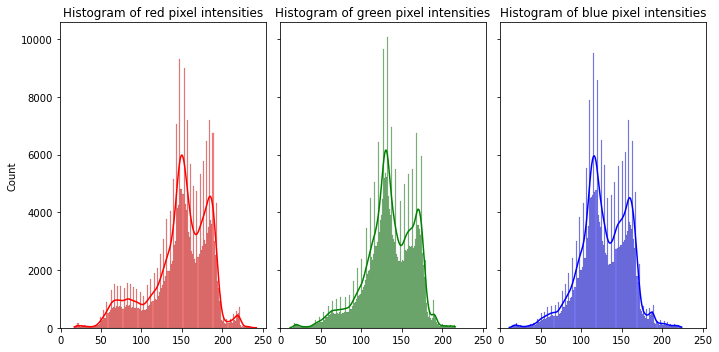

In [31]:
fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(10,5))
plt.subplot(1,3,1), sns.histplot(img_110[:,:,0].ravel(),color="red",kde=True),plt.title("Histogram of red pixel intensities")
plt.subplot(1,3,2), sns.histplot(img_110[:,:,1].ravel(),color="green",kde=True),plt.title("Histogram of green pixel intensities")
plt.subplot(1,3,3), sns.histplot(img_110[:,:,2].ravel(),color="blue",kde=True),plt.title("Histogram of blue pixel intensities")
plt.tight_layout()
plt.show()

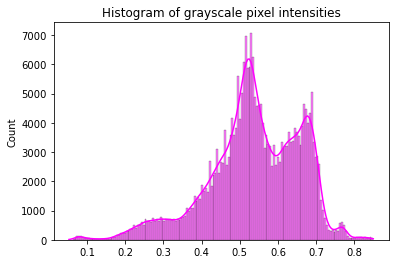

In [32]:
sns.histplot(img_110_grayscale.ravel(),color="magenta",kde=True)
plt.title("Histogram of grayscale pixel intensities")
plt.show()

# 5) Bonus

1. Perform a contrast stretch of the image. <br>
2. Perform a histogram equalisation of the image.

In [33]:
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)   
    
    return ((img-min_val)/(max_val-min_val))

#### Using the grayscale image

#### Contrast Stretching

In [34]:
img_contrast_stretch = contrast_stretching(img_110_grayscale)

#### Histogram Equalisation

In [35]:
histogram_equalisation = equalize_hist(img_110_grayscale)

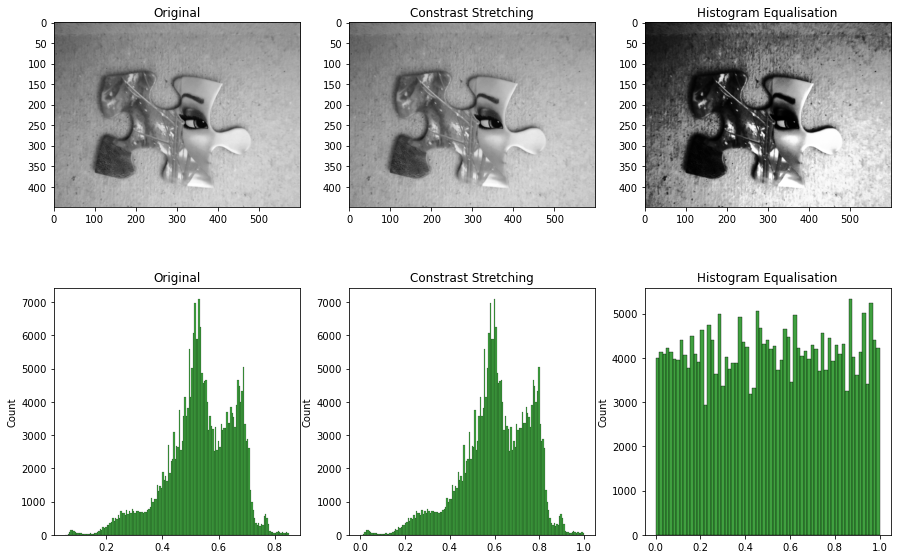

In [36]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
plt.subplot(2,3,1),plt.imshow(img_110_grayscale,cmap="gray"),plt.title("Original")
plt.subplot(2,3,2),plt.imshow(img_contrast_stretch,cmap="gray"),plt.title("Constrast Stretching")
plt.subplot(2,3,3),plt.imshow(histogram_equalisation,cmap="gray"),plt.title("Histogram Equalisation")
plt.subplot(2,3,4),sns.histplot(img_110_grayscale.ravel(),color="green"),plt.title("Original")
plt.subplot(2,3,5),sns.histplot(img_contrast_stretch.ravel(),color="green"),plt.title("Constrast Stretching")
plt.subplot(2,3,6),sns.histplot(histogram_equalisation.ravel(),color="green"),plt.title("Histogram Equalisation")
plt.show()

In [37]:
print(f"The mean pixel value of the original image is: {np.mean(img_110_grayscale)}")
print(f"The mean pixel value of the contrast stretched image is: {np.mean(img_contrast_stretch)}")
print(f"The mean pixel value of the histogram equalisation image is: {np.mean(histogram_equalisation)}")

The mean pixel value of the original image is: 0.5367658629745824
The mean pixel value of the contrast stretched image is: 0.6073411202788974
The mean pixel value of the histogram equalisation image is: 0.5040819215276463


In [38]:
print(f"The variance pixel value of the original image is: {np.var(img_110_grayscale)}")
print(f"The variance pixel value of the contrast stretched image is: {np.var(img_contrast_stretch)}")
print(f"The variance pixel value of the histogram equalisation image is: {np.var(histogram_equalisation)}")

The variance pixel value of the original image is: 0.014713165194173476
The variance pixel value of the contrast stretched image is: 0.023100045183762238
The variance pixel value of the histogram equalisation image is: 0.08357102513830898


#### Using the HSV image

#### Contrast Stretching

In [39]:
v_channel = contrast_stretching(img_110_hsv[:,:,2])
contrast_stretching_hsv = np.copy(img_110_hsv)
contrast_stretching_hsv[:,:,2] = v_channel

#### Histogram Equalisation

In [40]:
histogram_equalisation_HSV = equalize_hist(img_110_hsv)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


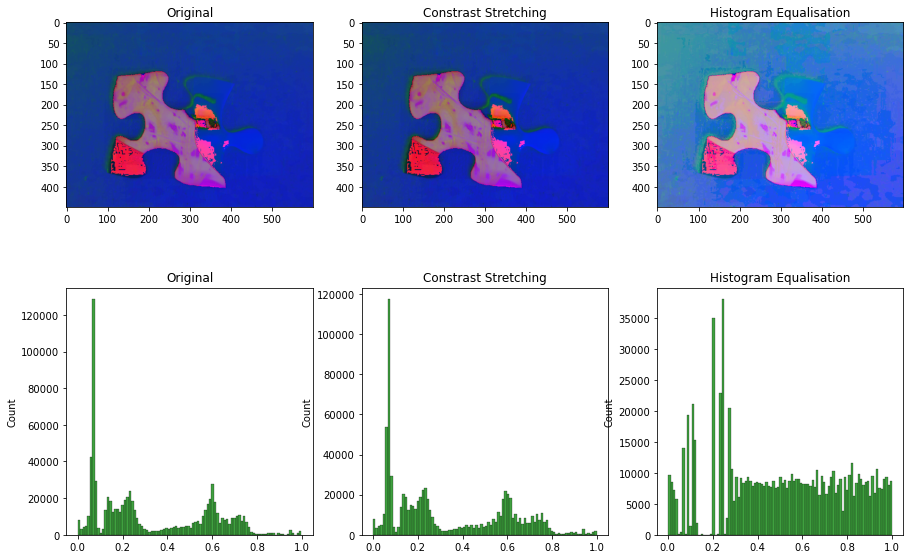

In [41]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
plt.subplot(2,3,1),plt.imshow(img_110_hsv,cmap="gray"),plt.title("Original")
plt.subplot(2,3,2),plt.imshow(contrast_stretching_hsv,cmap="gray"),plt.title("Constrast Stretching")
plt.subplot(2,3,3),plt.imshow(histogram_equalisation_HSV,cmap="gray"),plt.title("Histogram Equalisation")
plt.subplot(2,3,4),sns.histplot(img_110_hsv.ravel(),color="green"),plt.title("Original")
plt.subplot(2,3,5),sns.histplot(contrast_stretching_hsv.ravel(),color="green"),plt.title("Constrast Stretching")
plt.subplot(2,3,6),sns.histplot(histogram_equalisation_HSV.ravel(),color="green"),plt.title("Histogram Equalisation")
plt.show()

In [42]:
print(f"The mean pixel value of the original image is: {np.mean(img_110_hsv)}")
print(f"The mean pixel value of the contrast stretched image is: {np.mean(contrast_stretching_hsv)}")
print(f"The mean pixel value of the histogram equalisation image is: {np.mean(histogram_equalisation_HSV)}")

The mean pixel value of the original image is: 0.32574058031767267
The mean pixel value of the contrast stretched image is: 0.32738030403267304
The mean pixel value of the histogram equalisation image is: 0.5080704278790452


In [43]:
print(f"The variance pixel value of the original image is: {np.var(img_110_hsv)}")
print(f"The variance pixel value of the contrast stretched image is: {np.var(contrast_stretching_hsv)}")
print(f"The variance pixel value of the histogram equalisation image is: {np.var(histogram_equalisation_HSV)}")

The variance pixel value of the original image is: 0.06331459654050724
The variance pixel value of the contrast stretched image is: 0.06558321966299271
The variance pixel value of the histogram equalisation image is: 0.07931556070054453


# Make comment on change of values

# 6) Background Classifier

In [44]:
img_110 = img_as_float(img_110)
img_110_hsv = img_as_float(img_110_hsv)

1. Write a function that applies a convolution to an image with a kernel/filter, K, that is input as
a parameter to the function. Pad the image so that the height and width of the image are the
same before and after the convolution is applied

In [45]:
def apply_convolution(img,K):
    padding_size = int(np.floor((np.shape(K)[0]-1)/2))
    result = np.zeros(np.shape(img))
    ROWS,COLS = np.shape(img)
    img = np.pad(img,padding_size,mode='constant')
        
    filter_dimension = np.shape(K)[0]
    for i in range(ROWS):
        
        for j in range(COLS):
            tmp = img[i:i+filter_dimension , j:j+filter_dimension]
            result[i,j] = np.sum(tmp*K)
            
    return result

2. Apply the Vertical Prewitt, Horizontal Prewitt and Laplacian filters to one of your images (use
RGB values for the image, the filter should be applied to each channel separately). We will use
this one image to train a background classifier.

In [46]:
VERTICAL_PREWITT = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])
HORIZONTAL_PREWITT = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])
LAPLACIAN = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])

In [49]:
def normalize_image(img):
    img = (img-np.mean(img))/np.sqrt(np.var(img))
    return img

def convolve_img(img,K):
    r = apply_convolution(img[:,:,0],K)
    g = apply_convolution(img[:,:,1],K)    
    b = apply_convolution(img[:,:,2],K)
    result = np.stack((r,g,b),axis=-1)
    result = normalize_image(result)
    return result

def plot_filtered_imgs(vprewitt,hprewitt,laplacian):
    fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(15,15))
    plt.subplot(1,3,1), plt.imshow(vprewitt),plt.title("Vertical Prewitt")
    plt.subplot(1,3,2), plt.imshow(hprewitt),plt.title("Horizontal Prewitt")
    plt.subplot(1,3,3), plt.imshow(laplacian),plt.title("Laplacian")
    plt.tight_layout()
    plt.show()

In [50]:
# Vertical Prewitt to all the channels
vertical_prewitt_result = convolve_img(img_110,VERTICAL_PREWITT)

# Horziontal Prewitt to all the channels
horizontal_prewitt_result = convolve_img(img_110,HORIZONTAL_PREWITT)

# Laplacian to all the channels
laplacian_result = convolve_img(img_110,LAPLACIAN)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


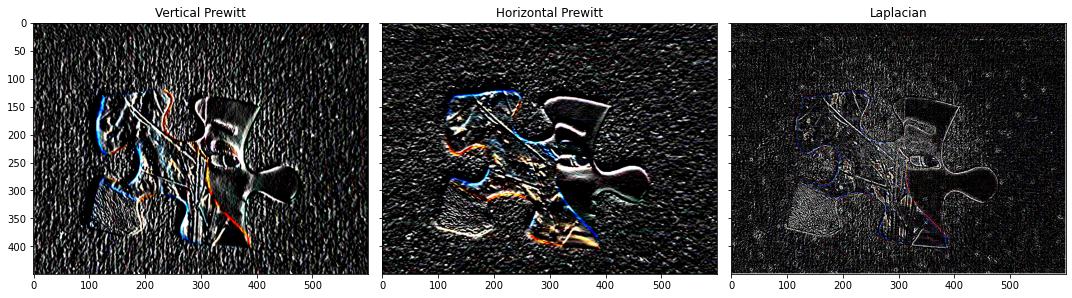

In [51]:
plot_filtered_imgs(vertical_prewitt_result,horizontal_prewitt_result,laplacian_result)

## Training

3. Using the output from Question 2 as well as the RGB and HSV pixel values of the image (15
features in total) calculate the mean (15-dimensional vector) and covariance (15 × 15 matrix) of
these features. The mean and covariance matrix from Question 3 are the learned parameters of
a multivariate Normal distribution. We can use it to make inferences about whether the pixels
from a new image belong to the background.

In [52]:
def extract_background_features(features,background):
    feature_vals = []
    for feature in features:
        feature_vals.append(feature[background][:,0].flatten())
        feature_vals.append(feature[background][:,1].flatten())    
        feature_vals.append(feature[background][:,2].flatten())
    
    return feature_vals

def extract_features(features):
    feature_vals = []
    for feature in features:
        feature_vals.append(feature[:,:,0].flatten())
        feature_vals.append(feature[:,:,1].flatten())    
        feature_vals.append(feature[:,:,2].flatten())
    
    return feature_vals

#### Creating the feature vector

In [53]:
img_110_mask = cv2.cvtColor(img_110_mask,cv2.COLOR_RGBA2GRAY)
background = np.where(img_110_mask == 0)

In [54]:
features = [vertical_prewitt_result,horizontal_prewitt_result,laplacian_result,img_110,img_110_hsv]
feature_vals = extract_background_features(features,background)
# for feature in features:
#     feature_vals.append(feature[background][:,0].flatten())
#     feature_vals.append(feature[background][:,1].flatten())    
#     feature_vals.append(feature[background][:,2].flatten())    

In [55]:
feature_vals = np.array(feature_vals)
# We use the transpose since each column will represent a feature and each row will represent a pixel/datapoint
# feature_vals = feature_vals.T
print(f"The shape of the feature vector is: {feature_vals.shape}")

The shape of the feature vector is: (15, 208635)


#### Creating the mean vector

In [56]:
mean_features = np.mean(feature_vals,axis=1)

print(f"The shape of the mean vector is: {np.shape(mean_features)}")
# print(mean_features)

The shape of the mean vector is: (15,)


#### Covariance matrix

In [57]:
covariance_matrix = np.cov(feature_vals)
print(f"The shape of the covariance matrix is: {np.shape(covariance_matrix)}")
# print(covariance_matrix)

The shape of the covariance matrix is: (15, 15)


### Training the model
This is equivalent to fitting a distribution to the learnt mean and covariance

In [58]:
distribution = multivariate_normal( mean=mean_features,cov=covariance_matrix,allow_singular=True)

## Validation

4. For a second image (our validation data) obtain the same features as those which were used to
train our model in Question 3. Now find the value of the probability density function of the new
data points being background pixels (HINT: scipy.stats.multivariate\_normal.pdf()).
Note that the value of the PDF is not the probability of the pixel being a background pixel – recall that to get the probability from a PDF you need to integrate between two values. If the PDF
value of a data point coming from the background of the image is above some threshold ($ \theta $)
classify it as being background. If not it belongs to the foreground. Think about how to find a
good value of $ \theta $, what threshold value gives your model the best performance? Compare your
model’s predictions to the mask for this image (you will have to invert black and white pixels in
the image) and calculate $ accuracy = 1 - \frac{1}{N} \sum{|predict_i - testmask_i|} $

Using img_83 as the validation data

#### Obtaining same features that were obtained for training image

In [59]:
img_83 = img_as_float(img_83)
img_83_hsv = img_as_float(img_83_hsv)
img_83_mask = cv2.cvtColor(img_83_mask,cv2.COLOR_RGBA2GRAY)

In [60]:
# Vertical Prewitt to all the channels
vertical_prewitt_result = convolve_img(img_83,VERTICAL_PREWITT)

# Horziontal Prewitt to all the channels
horizontal_prewitt_result = convolve_img(img_83,HORIZONTAL_PREWITT)

# Laplacian to all the channels
laplacian_result= convolve_img(img_83,LAPLACIAN)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


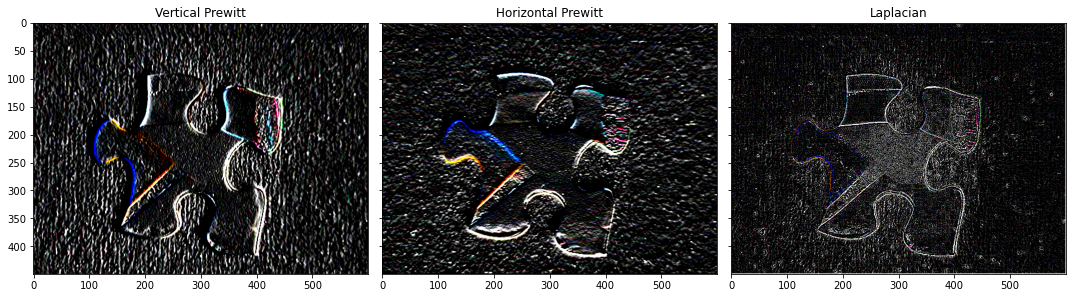

In [61]:
plot_filtered_imgs(vertical_prewitt_result,horizontal_prewitt_result,laplacian_result)

#### Creating the feature vector

In [62]:
features = [vertical_prewitt_result,horizontal_prewitt_result,laplacian_result,img_83,img_83_hsv]
feature_vals_83 = extract_features(features) 
feature_vals_83 = np.array(feature_vals_83)
# We use the transpose since each column will represent a feature and each row will represent a pixel/datapoint
feature_vals_83 = feature_vals_83.T
print(f"The shape of the feature vector is: {feature_vals_83.shape}")

The shape of the feature vector is: (270000, 15)


### Note:
We created the distribution using the mean and covariance obtained from the training image since this will be our trained model. <br>
We can then utilised the trained distribution to make inferences on the validation and test images.

In [66]:
validation_probs = distribution.pdf(x = feature_vals_83)
threshold = np.mean(mean_features)

In [67]:
def evaluate_model(threshold_value,pdf_values,img_shape = np.shape(img_83_grayscale)):
    background_probabilities = pdf_values>threshold_value

    # Binary Image Prediction
    ## Find the indices that will be classified as background pixels
    background_pixels_indices = np.where(background_probabilities == True)
    ## Create an array of 1's the same size as the mask and flatten it so we can index it with the background pixels above
    binary_result = np.ones(img_shape).flatten()
    ## Set the indices we found to be background pixels as 0.
    binary_result[background_pixels_indices] = 0
    ## reshape array into 2-d so we can plot it as an image
    binary_result = np.reshape(binary_result,img_shape)
    
    return binary_result

### Assigning threshold value $\theta$
In order to classify the points as background or foreground, we need to find a suitable threshold denoted by $\theta$. <br>
The threshold value I have chosen is the mean value of the mean features. Since we already calculated the mean of each feature for the training image, this resulted in a mean vector. My threshold is the mean of the mean vector.

In [68]:
binary_result_RGB = evaluate_model(threshold,validation_probs)

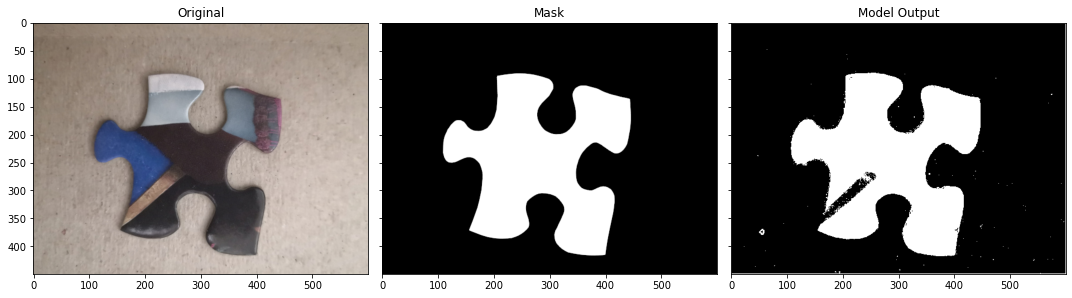

In [69]:
def plot_comparison(img,img_mask,model_mask):
    fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(15,15))
    plt.subplot(1,3,1), plt.imshow(img),plt.title("Original")
    plt.subplot(1,3,2), plt.imshow(img_mask,cmap="gray"),plt.title("Mask")
    plt.subplot(1,3,3), plt.imshow(model_mask,cmap="gray"),plt.title("Model Output")
    plt.tight_layout()
    plt.show()
    
plot_comparison(img_83,img_83_mask,binary_result_RGB)

### Comparing model output to mask

In [70]:
def accuracy(predicted,mask):
    N = mask.flatten().shape[0]
    diff =  np.abs(predicted-mask)
    acc = 1-((1/N)*(np.sum(diff)))
    return acc

In [72]:
valiation_accuracy = accuracy(binary_result_RGB,img_83_mask)
print(f'The validation accuracy is: {np.round(valiation_accuracy*100,3)}%')

The validation accuracy is: 97.543%


We can see from the images output above and the accuracy that the model performed decently with the chosen threshold value.

## Using HSV

5. Repeat the process from Question 3 (training) and 4 (inference) except now apply the two
Prewitt filters and the Laplacian filter to the HSV representation of the image. Does this improve
the accuracy of the model on the validation data? For a final attempt, repeat the training and
inference without the RGB pixels altogether

## Training

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


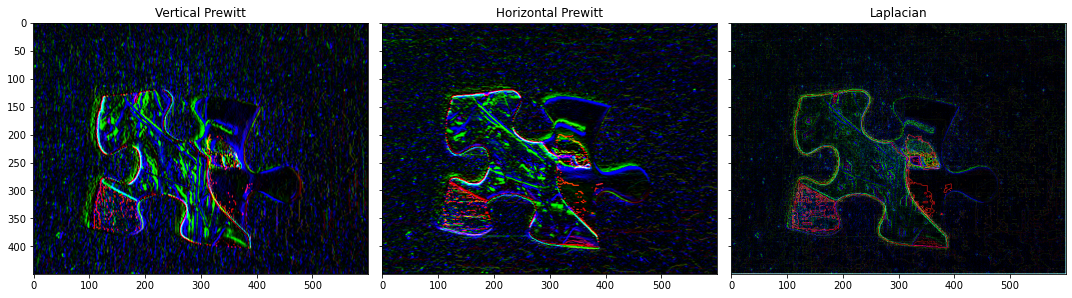

In [73]:
# Vertical Prewitt to all the channels
vertical_prewitt_result_HSV = convolve_img(img_110_hsv,VERTICAL_PREWITT)

# Horziontal Prewitt to all the channels
horizontal_prewitt_result_HSV = convolve_img(img_110_hsv,HORIZONTAL_PREWITT)

# Laplacian to all the channels
laplacian_result_HSV = convolve_img(img_110_hsv,LAPLACIAN)

plot_filtered_imgs(vertical_prewitt_result_HSV,horizontal_prewitt_result_HSV,laplacian_result_HSV)

#### Creating the feature vector

In [74]:
background = np.where(img_110_mask == 0)
features = [vertical_prewitt_result_HSV,horizontal_prewitt_result_HSV,laplacian_result_HSV,img_110,img_110_hsv]
feature_vals_HSV = extract_background_features(features,background)
feature_vals_HSV = np.array(feature_vals_HSV)
print(f"The shape of the feature vector is: {feature_vals_HSV.shape}")

#### Creating the mean vector

mean_features_HSV = np.mean(feature_vals_HSV,axis=1)

print(f"The shape of the mean vector is: {np.shape(mean_features_HSV)}")
# print(mean_features)

#### Covariance matrix

covariance_matrix_HSV = np.cov(feature_vals_HSV)
print(f"The shape of the covariance matrix is: {np.shape(covariance_matrix_HSV)}")
# print(covariance_matrix)

The shape of the feature vector is: (15, 208635)
The shape of the mean vector is: (15,)
The shape of the covariance matrix is: (15, 15)


### Training the model
This is equivalent to fitting a distribution to the learnt mean and covariance


In [75]:
distribution_HSV = multivariate_normal( mean=mean_features_HSV,cov=covariance_matrix_HSV,allow_singular=True)

## Validation

Since the validation data is the same, we will simply use the validation data we already created above.

### Getting the pdf values

In [76]:
validation_probs_HSV = distribution_HSV.pdf(x = feature_vals_83)

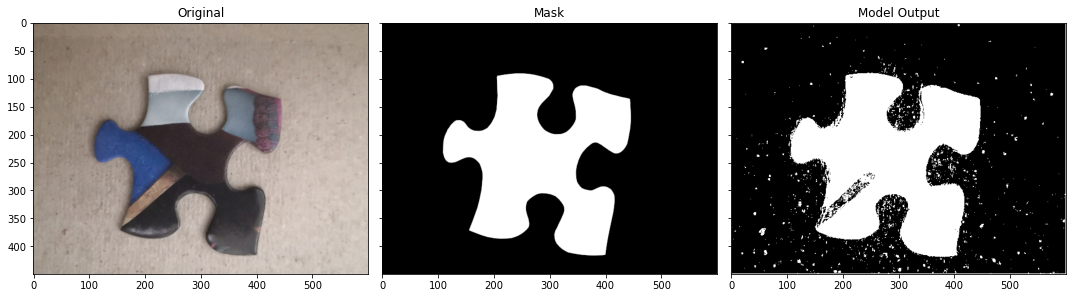

In [77]:
threshold_HSV = np.mean(mean_features_HSV)
binary_result_HSV = evaluate_model(threshold_HSV,validation_probs_HSV)
plot_comparison(img_83,img_83_mask,binary_result_HSV)

### Accuracy using HSV

In [78]:
validation_accuracy_HSV = accuracy(binary_result_HSV,img_83_mask)
print(f'The validation accuracy is: {np.round(validation_accuracy_HSV*100,3)}%')

The validation accuracy is: 95.429%


We can see that there was a decrease in the validation accuracy when using the HSV representation to create the background model.

## Using the grayscale images to generate model

## Training

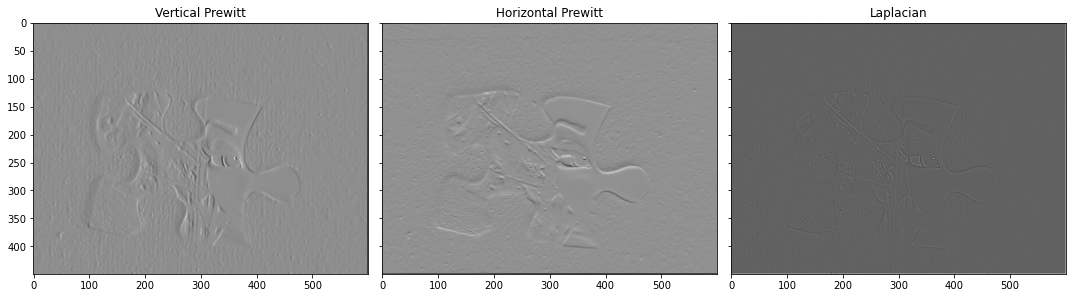

In [79]:
# Vertical Prewitt to all the channels
vertical_prewitt_result_grayscale = apply_convolution(img_110_grayscale,VERTICAL_PREWITT)

# Horziontal Prewitt to all the channels
horizontal_prewitt_result_grayscale = apply_convolution(img_110_grayscale,HORIZONTAL_PREWITT)

# Laplacian to all the channels
laplacian_result_grayscale = apply_convolution(img_110_grayscale,LAPLACIAN)

# Normalise results
vertical_prewitt_result_grayscale = normalize_image(vertical_prewitt_result_grayscale)
horizontal_prewitt_result_grayscale = normalize_image(horizontal_prewitt_result_grayscale)
laplacian_result_grayscale = normalize_image(laplacian_result_grayscale)

fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(15,15))
plt.subplot(1,3,1), plt.imshow(vertical_prewitt_result_grayscale,cmap="gray"),plt.title("Vertical Prewitt")
plt.subplot(1,3,2), plt.imshow(horizontal_prewitt_result_grayscale,cmap="gray"),plt.title("Horizontal Prewitt")
plt.subplot(1,3,3), plt.imshow(laplacian_result_grayscale,cmap="gray"),plt.title("Laplacian")
plt.tight_layout()
plt.show()

#### Creating the feature vector

In [80]:
background = np.where(img_110_mask == 0)
features = [vertical_prewitt_result_grayscale,horizontal_prewitt_result_grayscale,laplacian_result_grayscale,img_110_grayscale]
feature_vals_grayscale = []
for feature in features:
    feature_vals_grayscale.append(feature[background].flatten())

feature_vals_grayscale = np.array(feature_vals_grayscale)

print(f"The shape of the feature vector is: {feature_vals_grayscale.shape}")

#### Creating the mean vector

mean_features_grayscale = np.mean(feature_vals_grayscale,axis=1)

print(f"The shape of the mean vector is: {mean_features_grayscale.shape}")
# print(mean_features)

#### Covariance matrix

covariance_matrix_grayscale = np.cov(feature_vals_grayscale)
print(f"The shape of the covariance matrix is: {np.shape(covariance_matrix_grayscale)}")
# print(covariance_matrix)

The shape of the feature vector is: (4, 208635)
The shape of the mean vector is: (4,)
The shape of the covariance matrix is: (4, 4)


### Training the model
This is equivalent to fitting a distribution to the learnt mean and covariance


In [81]:
distribution_grayscale = multivariate_normal( mean=mean_features_grayscale,cov=covariance_matrix_grayscale)

## Validation

Since we removed the RGB values, we need to extract the adjusted features for the grayscale version

Using img_83 as the validation data

#### Obtaining same features that were obtained for training image

In [82]:
img_83_grayscale = img_as_float(img_83_grayscale)

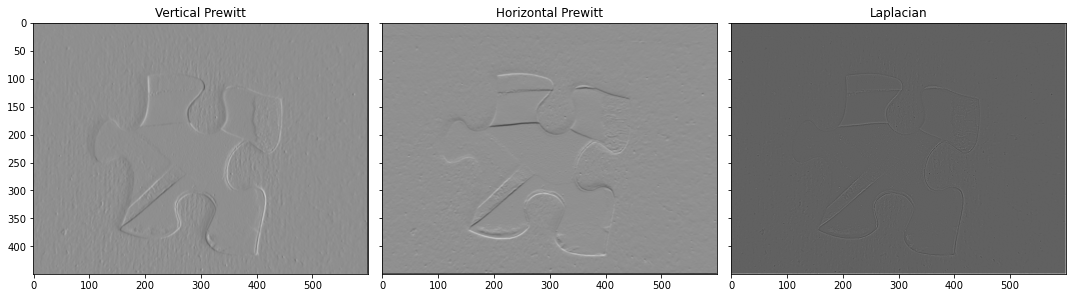

In [83]:
# Vertical Prewitt to all the channels
vertical_prewitt_result_grayscale = apply_convolution(img_83_grayscale,VERTICAL_PREWITT)

# Horziontal Prewitt to all the channels
horizontal_prewitt_result_grayscale = apply_convolution(img_83_grayscale,HORIZONTAL_PREWITT)

# Laplacian to all the channels
laplacian_result_grayscale = apply_convolution(img_83_grayscale,LAPLACIAN)

# Normalise results
vertical_prewitt_result_grayscale = normalize_image(vertical_prewitt_result_grayscale)
horizontal_prewitt_result_grayscale = normalize_image(horizontal_prewitt_result_grayscale)
laplacian_result_grayscale = normalize_image(laplacian_result_grayscale)

fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(15,15))
plt.subplot(1,3,1), plt.imshow(vertical_prewitt_result_grayscale,cmap="gray"),plt.title("Vertical Prewitt")
plt.subplot(1,3,2), plt.imshow(horizontal_prewitt_result_grayscale,cmap="gray"),plt.title("Horizontal Prewitt")
plt.subplot(1,3,3), plt.imshow(laplacian_result_grayscale,cmap="gray"),plt.title("Laplacian")
plt.tight_layout()
plt.show()

#### Creating the feature vector

In [84]:
features = [vertical_prewitt_result_grayscale,horizontal_prewitt_result_grayscale,laplacian_result_grayscale,img_83_grayscale]
feature_vals_83_grayscale = []
for feature in features:
    feature_vals_83_grayscale.append(feature.flatten())  

In [85]:
feature_vals_83_grayscale = np.array(feature_vals_83_grayscale)
# We use the transpose since each column will represent a feature and each row will represent a pixel/datapoint
feature_vals_83_grayscale = feature_vals_83_grayscale.T
print(f"The shape of the feature vector is: {feature_vals_83_grayscale.shape}")

The shape of the feature vector is: (270000, 4)


### Getting the pdf values

In [86]:
validation_probs_grayscale = distribution_grayscale.pdf(x = feature_vals_83_grayscale)

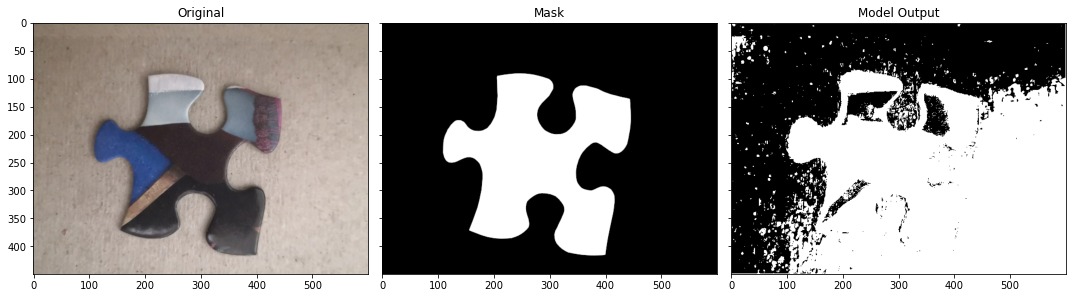

In [87]:
threshold_grayscale = np.mean(mean_features_grayscale)
binary_result_grayscale = evaluate_model(threshold_grayscale,validation_probs_grayscale)
plot_comparison(img_83,img_83_mask,binary_result_grayscale)

### Grayscale accuracy

In [88]:
validation_accuracy_grayscale = accuracy(binary_result_grayscale,img_83_mask)
print(f'The validation accuracy is: {np.round(validation_accuracy_grayscale*100,3)}%')

The validation accuracy is: 61.292%


We can see a further decrease in accuracy when using the grayscale features to construct a distribution.

## Testing

6. Use the model from above which gave the best accuracy. Apply it to your third (test) image.
What is its accuracy? What else could be done to improve the model’s performance?

The first model which we used the RGB images to create the features and generate a model will be used since it achieved the best validation accuracy.

In [142]:
img_35 = img_as_float(img_35)
img_35_hsv = img_as_float(img_35_hsv)
img_35_mask = cv2.cvtColor(img_35_mask,cv2.COLOR_RGBA2GRAY)

#### Extrating the features for the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


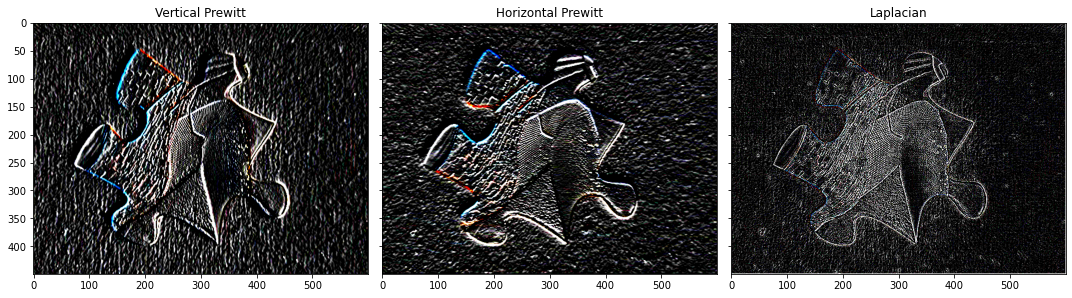

In [143]:
# Vertical Prewitt to all the channels
vertical_prewitt_result = convolve_img(img_35,VERTICAL_PREWITT)

# Horziontal Prewitt to all the channels
horizontal_prewitt_result  = convolve_img(img_35,HORIZONTAL_PREWITT)

# Laplacian to all the channels
laplacian_result = convolve_img(img_35,LAPLACIAN)

plot_filtered_imgs(vertical_prewitt_result,horizontal_prewitt_result,laplacian_result)

In [144]:
features = [vertical_prewitt_result,horizontal_prewitt_result,laplacian_result,img_35,img_35_hsv]
feature_vals_35 = extract_features(features)
feature_vals_35 = np.array(feature_vals_35)
# We use the transpose since each column will represent a feature and each row will represent a pixel/datapoint
feature_vals_35 = feature_vals_35.T
print(f"The shape of the feature vector is: {feature_vals_35.shape}")

The shape of the feature vector is: (270000, 15)


## Getting the PDF values

#### Using RGB model

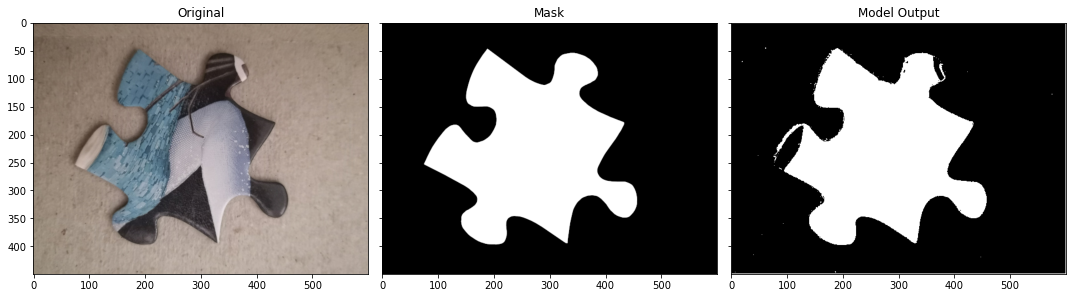

In [145]:
test_proba_RGB = distribution.pdf(feature_vals_35)
binary_result_test_RGB = evaluate_model(threshold,test_proba_RGB)
plot_comparison(img_35,img_35_mask,binary_result_test_RGB)

#### Using HSV model

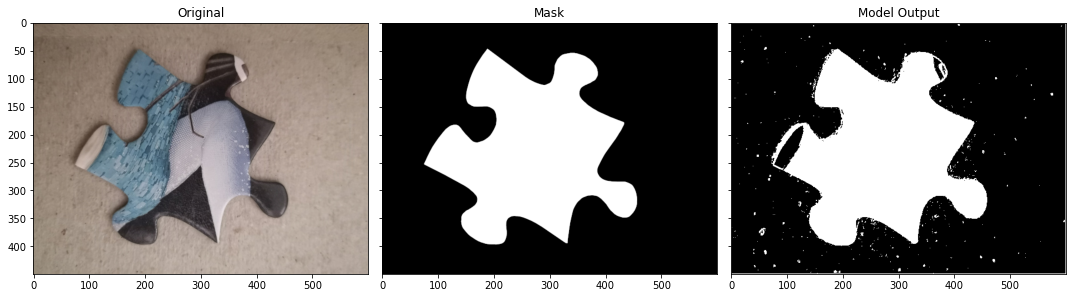

In [146]:
test_proba_HSV = distribution_HSV.pdf(feature_vals_35)
binary_result_test_HSV = evaluate_model(threshold_HSV,test_proba_HSV)
plot_comparison(img_35,img_35_mask,binary_result_test_HSV)

## Test accuracy

### Original model using RGB

In [147]:
test_accuracy_RGB = accuracy(binary_result_test_RGB,img_35_mask)
print(f"the test accuracy is: {np.round(test_accuracy_RGB*100,3)}%")

the test accuracy is: 97.357%


### Original model using HSV

In [148]:
test_accuracy_HSV = accuracy(binary_result_test_HSV,img_35_mask)
print(f"the test accuracy is: {np.round(test_accuracy_HSV*100,3)}%")

the test accuracy is: 96.279%


7. Analyse the performance of the previous models in detail:

(a) Calculate the confusion matrices for both models on the test image.

In [149]:
ind = img_35_mask<0.5
ind2 = img_35_mask>=0.5

img_35_mask[ind] = 0
img_35_mask[ind2] = 1

In [150]:
rgb_confusion =  confusion_matrix(binary_result_test_RGB.astype(np.uint8).flatten(),img_35_mask.flatten())
hsv_confusion =  confusion_matrix(binary_result_test_HSV.astype(np.uint8).flatten(),img_35_mask.flatten())

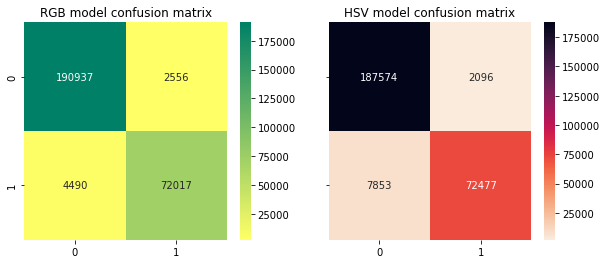

In [164]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4),sharex=True,sharey=True)
plt.subplot(1,2,1) , sns.heatmap(rgb_confusion,annot=True,fmt='g',cmap="summer_r"),plt.title("RGB model confusion matrix")
plt.subplot(1,2,2) , sns.heatmap(hsv_confusion,annot=True,fmt='g',cmap = "rocket_r"),plt.title("HSV model confusion matrix")
plt.show()

(b) Based on the confusion matrices, calculate the Cohen’s Kappa for both models on the test
image.

In [168]:
cohen_kapp = cohen_kappa_score(binary_result_test_RGB.flatten(),binary_result_test_HSV.flatten())
print(f"The Cohen Kappa score is: {cohen_kapp}")

The Cohen Kappa score is: 0.9603009550218774


Since the Cohen Kappa score is closer to 1, we can see that there is a larger degree of agreement between the two models. This implies that majority of the pixels are classified in the same category by both models.


(c) Calculate the intersection-over-union of the predicted mask.

In [178]:
# predicted mask from the best-performing (RGB) model
overlap = 0
for i in range(binary_result_test_RGB.shape[0]):
    for j in range(binary_result_test_RGB.shape[1]):
        # false because we were predicting background pixels
        if (binary_result_test_RGB[i,j] == False and img_35_mask[i,j] == False):
                overlap += 1

# count zero for False (background pixels)
union = (binary_result_test_RGB.shape[0]*binary_result_test_RGB.shape[1] - np.count_nonzero(binary_result_test_RGB)) + (img_35_mask.shape[0]*img_35_mask.shape[1] - np.count_nonzero(img_35_mask)) - overlap
intersection_over_union = overlap / union
print("Intersection-over-union of predicted mask from RGB model: %f" % intersection_over_union)

Intersection-over-union of predicted mask from RGB model: 0.964411


Since the intersection over union is close to 1, we can see there is a large intersection between the predicted mask and the original mask. This implies that the predicted mask is very close to the actual mask and does a good job in classifying background pixels.

(d) Plot the Receiver Operating Characteristic (ROC) curve and Precision-Recall curves by varying the threshold (Θ) on the probability density of the background model. How could you
use this graph to find an optimal threshold?


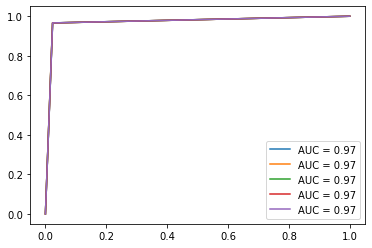

In [265]:
different_threshold = np.random.uniform(0, 1,5)

for t in different_threshold:
    result = evaluate_model(t,test_proba_RGB)

    fpr, tpr, t1 = roc_curve(img_35_mask.flatten(), result.flatten())
    roc_auc = auc(fpr,tpr)
    precision, recall, t2 = precision_recall_curve(img_35_mask.flatten(), result.flatten())
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
#     plt.plot(fpr, tpr, label = t)
    
#     plt.plot(recall, precision, label=t)
    plt.legend()
#     plt.show()
    
plt.show()


In [216]:
fpr, tpr, t1 = roc_curve(img_35_mask.flatten(), binary_result_test_RGB.flatten())
roc_auc = auc(tpr,fpr)
precision, recall, t2 = precision_recall_curve(img_35_mask.flatten(), binary_result_test_RGB.flatten())

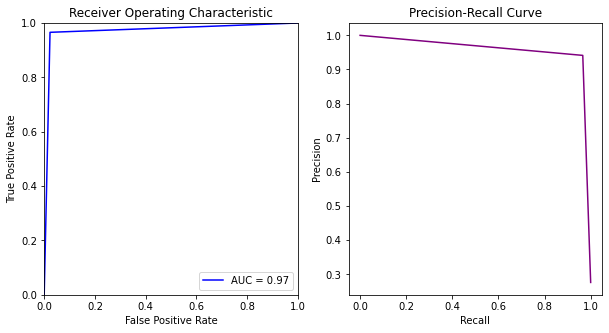

In [233]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
plt.subplot(1,2,1),plt.title('Receiver Operating Characteristic'),plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc),plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.subplot(1,2,2),plt.plot(recall, precision, color='purple'),plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()